In [2]:
# -*- coding: utf-8 -*-
import requests
#from bs4 import BeautifulSoup
from pyquery import PyQuery as pq
import os
html=requests.get('http://psych.bnu.edu.cn/tabid/51/ArticleID/50/frtid/50/Default.aspx')
#print(html.text)

#正则提取
#soup=BeautifulSoup(html.content,'lxml',from_encoding='utf-8')
#print(soup.findall(attrs={'class':'zw_name'}))
#print(soup.findall(text='教授'))
doc=pq(html.content)
#t=doc('p')
#print(t)
#print(t.text())

#print(doc('.zw_name'))
a=doc('.zw_name')
b=a.siblings()
c=doc('.zw_div')
d=c.siblings()
#b=doc('.zw_tel')


print(a.text())
print(b.text())
print(c.text())
print(d.text())
#print(b.text())

林崇德教授
校教学指导委员会主任  电话：010-58805286 E-mail： 研究方向：认知发展；学科能力发展。
个人履历 科学研究 教学工作 社会工作 其他
学习经历：
1941年2月27日生于浙江省象山县
1960年8月考入北京师范大学教育系心理专业

工作经历：
1965年7月大学毕业后从事过13年的基础教育工作
1978年归队回母校当研究生，1980年5月提前毕业
1981年12月定为讲师
1984年3月获得博士学位
1986年6月破格晋升为教授
1990年2月担任博士生导师
1985年5月担任北京师范大学发展心理研究所副所长
1989年12月至1999年12月担任所长。  科研项目：
国家社科基金重点项目：教育与发展――创新人才心理学整合研究  2001－2005
教育部人文社科基地重大项目：中小学生智力发展与促进 2001－2005
教育部社科重大攻关项目：创新人才与教育创新的研究 2003－2007
思维过程中的执行加工与自我监控：时间相关电位的研究   国家自然科学基金委2006－2009
教育部思政司重大项目：心理健康教育体系的研究   2007－2010
教育部哲学社会科学研究重大课题攻关项目：灾后中小学生心理疏导研究（08JZD0026 ）
教育部"金融危机应对研究"应急课题：金融危机背景下大学生经济信心的重建与就业能力的提升（2009JYJR005 ）

科研成果：
发表论文
英文：

1、Lin Chongde，Li Tsingan. Multiple Intelligence and the Structure of Thinking. Theory & Psychology, 2003, 13(6):829-845（SSCI ）
2、Chongde Lin, Weiping Hu, Philip Adey, Jiliang Shen. The Influence of CASE on Scientific Creativity. Research in Science Education, 2003, 33:143-162(SSCI)
3、Chongde Lin, Weiping Hu, Philip Adey, Jiliang Shen. The Influence of CASE on Scientific Creativit

In [3]:
#写入文件

t=open('mm.txt','w',encoding='utf-8')
#print(a.text(),b.text(),c.text(),d.text(),sep="n/",file=t)

t.write(a.text())
t.write('\n')
t.write(b.text())
t.write('\n')
t.write(c.text())

t.write(d.text())

#t.write(r.text)
t.close()

In [4]:
#给文件改名为“林崇德”

ul=str(os.getcwd())
print(ul)


#filenamelist=os.listdir(ul)



f=open(ul+"/mm.txt","r",encoding='utf-8')
#tt=f.readline()
lines = f.readlines()
modname = lines[0] 
print(modname)

f.close()

/Users/exudingtao/PycharmProjects/Exuding/Weibo-epidemic-situation-moocs
林崇德教授



In [5]:
#===================================================
##os.rename有问题

oldname=os.path.join(ul,'mm.txt')
#print(oldname)

#oldname="E:\课程\第一学期_2019年9-12月\python-蒋挺\期末作业-董文娟\mm.txt"

#os.path.isfile(oldname)
#newname=ul+"/"+modname+".txt"
newname=os.path.join(ul,modname+".txt")
print(newname)

/Users/exudingtao/PycharmProjects/Exuding/Weibo-epidemic-situation-moocs/林崇德教授
.txt


In [6]:
os.rename(oldname,newname)

In [7]:
#================================================
##词云也运行不对
#做词云

from wordcloud import WordCloud
#import PIL.Image as image
import matplotlib.pyplot as plt

import jieba

In [8]:
with open(newname,"r",encoding='utf-8') as fp:
    text=fp.readlines()
    res_content = []
    for line in text:
        line = line.strip()
        line = line.strip('\n')
        line=line.split(",")
        res_content.extend(line)

In [9]:
#去停用词
stop_word_path = './data/stopword.txt'
stop_word_list = [sw.replace('\n','') for sw in open(stop_word_path).readlines()]

def preprocess_text(content_lines,sentences):
    for line in content_lines:
        try:
            segs = jieba.lcut(line)
            #segs = list(filter(lambda x: len(x)>1,segs))
            segs = list(filter(lambda x: x not in stop_word_list,segs))
            sentences.append(' '.join(segs))#分完词后 用空格串起来
        except Exception as e:
            print(line)
            continue

In [10]:
sentences = []

In [11]:
preprocess_text(res_content,sentences)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/w9/tlt3s4ts6n160mg7yfn1qn500000gn/T/jieba.cache
Loading model cost 0.664 seconds.
Prefix dict has been built succesfully.


In [12]:
word_stat = {}
for item in sentences:
    for i in item.split(' '):
        if i != '' and '.' not in i:
            if i not in word_stat:
                word_stat[i] = 1
            else:
                word_stat[i] = word_stat[i] + 1

In [13]:
import pandas as pd

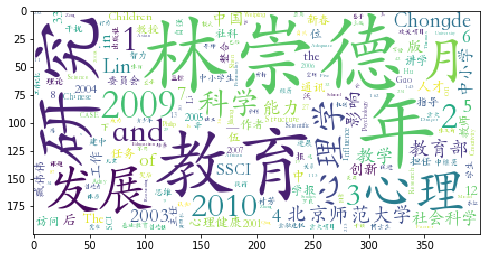

In [15]:
#做词云
wordcloud = WordCloud(font_path='./data/Kaiti.ttc',background_color='white',
                   max_words=500,  # 词云显示的最大词数
                   max_font_size=80,  # 字体最大值
                   random_state=42,)
wordcloud = wordcloud.fit_words(word_stat)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)